# OncoPredict: Clinical Trial Completion Prediction
## Complete Data Analysis Pipeline

**Author:** Kaustubh Shah  
**Date:** February 2026  
**Project:** Predicting Clinical Trial Completion Risk

---

## Executive Summary

### The Problem
Approximately **40% of clinical trials terminate early**, wasting over **$800 million annually** and delaying potentially life-saving treatments for patients. Early termination happens for various reasons: safety issues, poor enrollment, lack of efficacy, or insufficient funding.

### The Opportunity
Can we predict which trials are at risk of early termination based on their design characteristics? This would help:
- **Pharmaceutical companies:** Identify high-risk trials before investing millions
- **Investors:** Make informed decisions about biotech investments
- **Trial managers:** Prioritize recruitment efforts and resource allocation
- **Patients:** Make informed enrollment decisions based on completion likelihood

### The Approach
Build a machine learning model using trial design features (enrollment size, phase, trial complexity, duration, etc.) to predict completion probability.

### The Data
**Data source:**
- **ClinicalTrials.gov API:** 10,000 cancer clinical trials
- **Time period:** 2000-2025
- **Coverage:** All cancer trials with clear completion outcomes
- **Final dataset:** 10,000 trials after cleaning and feature engineering

---

## Table of Contents

1. [Data Sources & Collection Strategy](#1-data-sources)
2. [Setup & Environment](#2-setup)
3. [Load Data](#3-load-data)
4. [Initial Data Exploration](#4-initial-exploration)
5. [Data Quality Assessment](#5-data-quality)
6. [Outlier Detection & Handling](#6-outliers)
7. [Data Cleaning](#7-cleaning)
8. [Target Variable Analysis](#8-target-analysis)
9. [Univariate Analysis](#9-univariate)
10. [Bivariate Analysis](#10-bivariate)
11. [Correlation Analysis](#11-correlation)
12. [Feature Engineering](#12-feature-engineering)
13. [Final Dataset Summary](#13-final-summary)
14. [Key Insights & Conclusions](#14-conclusions)

---

**Note:** This notebook focuses on **Exploratory Data Analysis (EDA)** and **Data Cleaning**. The modeling pipeline (training, evaluation, predictions) is documented separately.

---

<a id='1-datasources'></a>
## 1. Data Sources And Collection Strategy

Refer to scripts in data collection and data processing folders 

<a id='2-setup'></a>
## 2. Setup & Environment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully!")
print(f"   Pandas version: {pd.__version__}")
print(f"   NumPy version: {np.__version__}")

Libraries imported successfully!
   Pandas version: 2.3.3
   NumPy version: 2.2.6


<a id='3-load-data'></a>
## 3. Load Data

In [2]:
# Load the dataset
data_dir = Path("../data/processed")
df = pd.read_csv('../data/processed/trials_completion_ml_20260131_182822.csv')
print(f"   Shape: {df.shape}")
print(f"   Rows (trials): {len(df):,}")
print(f"   Columns (features): {df.shape[1]}")
print(f"\n   Data sources combined:")
print(f"ClinicalTrials.gov (trial characteristics)")
print(f"FDA Drugs@FDA (approval status)")

   Shape: (10000, 34)
   Rows (trials): 10,000
   Columns (features): 34

   Data sources combined:
ClinicalTrials.gov (trial characteristics)
FDA Drugs@FDA (approval status)


<a id='4-initial-exploration'></a>
## 4. Initial Data Exploration

First look at what we're working with.

In [3]:
# First 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,nct_id,title,official_title,overall_status,phase,study_type,enrollment_count,enrollment_type,start_date,completion_date,lead_sponsor,sponsor_class,allocation,intervention_model,masking,intervention_types,intervention_names,conditions,primary_outcome_measures,min_age,max_age,sex,has_results,trial_duration_days,is_completed,is_recruiting,phase_numeric,is_randomized,is_blinded,is_industry_sponsored,intervention_count,completed,enrollment_bucket,tests_approved_drug
0,NCT00939991,"Suberoylanilide Hydroxamic Acid (SAHA), Bevaci...",Phase I/II Study of Bevacizumab Plus Daily Tem...,COMPLETED,PHASE1,INTERVENTIONAL,48.00,ACTUAL,2009-10-01,2013-04-01,Katy Peters,OTHER,NON_RANDOMIZED,SINGLE_GROUP,NONE,DRUG,Vorinostst/Bevacizumab/Temozolomide,"Brain Tumor, Glioblastoma",NaN,NaN,NaN,NaN,False,1278.00,True,False,1.00,False,False,False,1,1,Medium (30-100),1
1,NCT00512291,Subcutaneous Olanzapine for Hyperactive or Mix...,Study of Subcutaneous Olanzapine for Hyperacti...,COMPLETED,NaN,INTERVENTIONAL,25.00,ACTUAL,2005-06-01,2009-08-01,M.D. Anderson Cancer Center,OTHER,NON_RANDOMIZED,SINGLE_GROUP,NONE,DRUG,Olanzapine,Advanced Cancer,NaN,NaN,NaN,NaN,False,1522.00,True,False,NaN,False,False,False,1,1,Small (<30),0
2,NCT05896774,A Study to Learn About the Study Medicine (Map...,"AN OPEN-LABEL, PHASE 1 STUDY EVALUATING THE PH...",COMPLETED,PHASE1,INTERVENTIONAL,10.00,ACTUAL,2023-06-28,2024-11-06,Pfizer,INDUSTRY,NaN,SINGLE_GROUP,NONE,DRUG,Maplirpacept,"Non-Hodgkin Lymphoma, Multiple Myeloma",NaN,NaN,NaN,NaN,False,497.00,True,False,1.00,False,False,True,1,1,Small (<30),0
3,NCT06046274,GEN1046 in Combination With Anticancer Agents ...,"A Phase 2 Exploratory, Multicenter, Open-Label...",WITHDRAWN,PHASE2,INTERVENTIONAL,0.00,ACTUAL,2023-10-01,2028-06-01,Genmab,INDUSTRY,NON_RANDOMIZED,SINGLE_GROUP,NONE,"BIOLOGICAL, BIOLOGICAL","Pembrolizumab, Acasunlimab",Advanced Endometrial Cancer,NaN,NaN,NaN,NaN,False,1705.00,True,False,2.00,False,False,True,2,0,NaN,1
4,NCT02495974,European Observational Study of Enzalutamide i...,A European Prospective Observational Study Ass...,COMPLETED,NaN,OBSERVATIONAL,1763.00,ACTUAL,2015-09-08,2019-02-08,Astellas Pharma Europe Ltd.,INDUSTRY,NaN,NaN,NaN,DRUG,enzalutamide,Metastatic Castration Resistant Prostate Cancer,NaN,NaN,NaN,NaN,False,1249.00,True,False,NaN,False,False,True,1,1,Very Large (300+),1


In [4]:
# Column names and types
print("Dataset Structure:")
print(f"\nTotal columns: {len(df.columns)}\n")

# Group by data type
print("Columns by type:")
for dtype in df.dtypes.unique():
    cols = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype}:")
    for col in cols[:10]:  # Show first 10
        print(f"  - {col}")
   

Dataset Structure:

Total columns: 34

Columns by type:

object:
  - nct_id
  - title
  - official_title
  - overall_status
  - phase
  - study_type
  - enrollment_type
  - start_date
  - completion_date
  - lead_sponsor

float64:
  - enrollment_count
  - primary_outcome_measures
  - min_age
  - max_age
  - sex
  - trial_duration_days
  - phase_numeric

bool:
  - has_results
  - is_completed
  - is_recruiting
  - is_randomized
  - is_blinded
  - is_industry_sponsored

int64:
  - intervention_count
  - completed
  - tests_approved_drug


In [5]:
# Detailed info
print("Detailed Dataset Information:")
df.info()

Detailed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nct_id                    10000 non-null  object 
 1   title                     10000 non-null  object 
 2   official_title            9911 non-null   object 
 3   overall_status            10000 non-null  object 
 4   phase                     6231 non-null   object 
 5   study_type                10000 non-null  object 
 6   enrollment_count          9810 non-null   float64
 7   enrollment_type           9675 non-null   object 
 8   start_date                9937 non-null   object 
 9   completion_date           9576 non-null   object 
 10  lead_sponsor              10000 non-null  object 
 11  sponsor_class             10000 non-null  object 
 12  allocation                4648 non-null   object 
 13  intervention_model        7842 n

In [6]:
# Basic statistics for numerical columns
print("Summary Statistics (Numerical Features):")
df.describe()

Summary Statistics (Numerical Features):


,enrollment_count,primary_outcome_measures,min_age,max_age,sex,trial_duration_days,phase_numeric,intervention_count,completed,tests_approved_drug
count,9810.00,0.00,0.00,0.00,0.00,9557.00,6231.00,10000.00,10000.00,10000.00
mean,2519.77,NaN,NaN,NaN,NaN,1637.93,1.80,2.09,0.79,0.29
std,105315.10,NaN,NaN,NaN,NaN,1382.22,0.81,1.93,0.41,0.45
min,0.00,NaN,NaN,NaN,NaN,0.00,0.50,0.00,0.00,0.00
25%,20.00,NaN,NaN,NaN,NaN,700.00,1.00,1.00,1.00,0.00
50%,49.00,NaN,NaN,NaN,NaN,1303.00,2.00,2.00,1.00,0.00
75%,135.00,NaN,NaN,NaN,NaN,2152.00,2.00,3.00,1.00,1.00
max,8000000.00,NaN,NaN,NaN,NaN,15059.00,4.00,42.00,1.00,1.00


<a id='5-data-quality'></a>
## 5. Data Quality Assessment

Before analysis, we must understand data quality issues.

Missing Values Summary:
                          Missing Count  Percentage
primary_outcome_measures          10000      100.00
sex                               10000      100.00
max_age                           10000      100.00
min_age                           10000      100.00
allocation                         5352       53.52
phase_numeric                      3769       37.69
phase                              3769       37.69
intervention_model                 2158       21.58
masking                            2074       20.74
enrollment_bucket                   799        7.99
intervention_names                  772        7.72
intervention_types                  770        7.70
trial_duration_days                 443        4.43
completion_date                     424        4.24
enrollment_type                     325        3.25


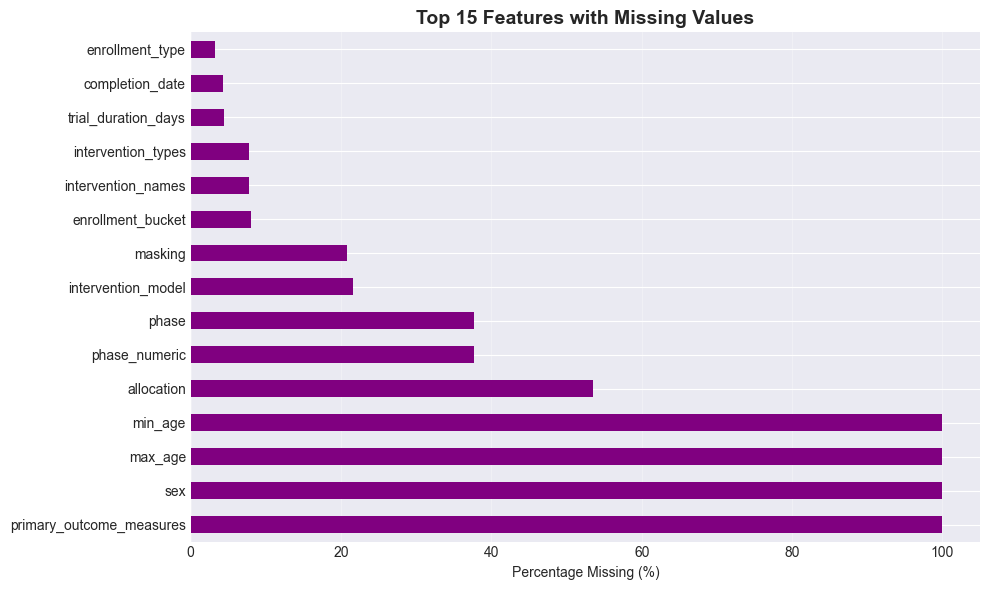

In [7]:
# Missing values analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    print("Missing Values Summary:")
    print(missing_df.head(15))
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_df['Percentage'].head(15).plot(kind='barh', ax=ax, color='purple')
    ax.set_xlabel('Percentage Missing (%)')
    ax.set_title('Top 15 Features with Missing Values', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values")

In [8]:
# Check for duplicates
duplicates = df.duplicated(subset=['nct_id']).sum()

print(f"Duplicate Check:")
print(f"  Duplicate NCT IDs: {duplicates}")

if duplicates > 0:
    
    dup_ids = df[df.duplicated(subset=['nct_id'], keep=False)]['nct_id'].unique()
    print(f"  Examples: {list(dup_ids[:5])}")
    print(f"\n  Action needed: Investigate and remove duplicates")
else:
    print(" No duplicates ")

Duplicate Check:
  Duplicate NCT IDs: 0
 No duplicates 


In [9]:
# Check data types
print("Data Type Validation:\n")

# Check if boolean columns are actually boolean
bool_cols = ['completed', 'has_results', 'is_randomized', 'is_blinded', 'is_industry_sponsored']
for col in bool_cols:
    if col in df.columns:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1, True, False}):
            print(f"{col}: Valid binary (values: {list(unique_vals)})")
        else:
            print(f"{col}: Unexpected values: {unique_vals}")

# Check if date columns are datetime
date_cols = ['start_date', 'completion_date']
for col in date_cols:
    if col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"{col}: Valid datetime")
        else:
            print(f"{col}: Not datetime (type: {df[col].dtype})")

Data Type Validation:

completed: Valid binary (values: [np.int64(1), np.int64(0)])
has_results: Valid binary (values: [np.False_])
is_randomized: Valid binary (values: [np.False_, np.True_])
is_blinded: Valid binary (values: [np.False_, np.True_])
is_industry_sponsored: Valid binary (values: [np.False_, np.True_])
start_date: Not datetime (type: object)
completion_date: Not datetime (type: object)


<a id='6-outliers'></a>
## 6. Outlier Detection & Handling



In [10]:
# Enrollment count analysis
print("\nBasic Statistics:")
print(df['enrollment_count'].describe())


Basic Statistics:
count      9810.00
mean       2519.77
std      105315.10
min           0.00
25%          20.00
50%          49.00
75%         135.00
max     8000000.00
Name: enrollment_count, dtype: float64


The maimum number of participants is too high. Typically, the number of people participating in a drug trial are 300 to 3000. Source: https://www.covenanthealth.com/blog/clinical-trials-phases/

This is clearly a data entry error


In [11]:
# Percentile analysis
print("\nPercentile Analysis:")
percentiles = [50, 75, 90, 95, 99, 99.5, 99.9, 100]
for p in percentiles:
    val = df['enrollment_count'].quantile(p/100)
    print(f"  {p:5.1f}th percentile: {val:>12,.0f}")

# How many extreme outliers?
threshold_99 = df['enrollment_count'].quantile(0.99)
outliers = (df['enrollment_count'] > threshold_99).sum()
print(f"\n Trials above 99th percentile ({threshold_99:.0f}): {outliers} ({outliers/len(df)*100:.1f}%)")


Percentile Analysis:
   50.0th percentile:           49
   75.0th percentile:          135
   90.0th percentile:          410
   95.0th percentile:          834
   99.0th percentile:        5,757
   99.5th percentile:       20,486
   99.9th percentile:      210,911
  100.0th percentile:    8,000,000

 Trials above 99th percentile (5757): 99 (1.0%)


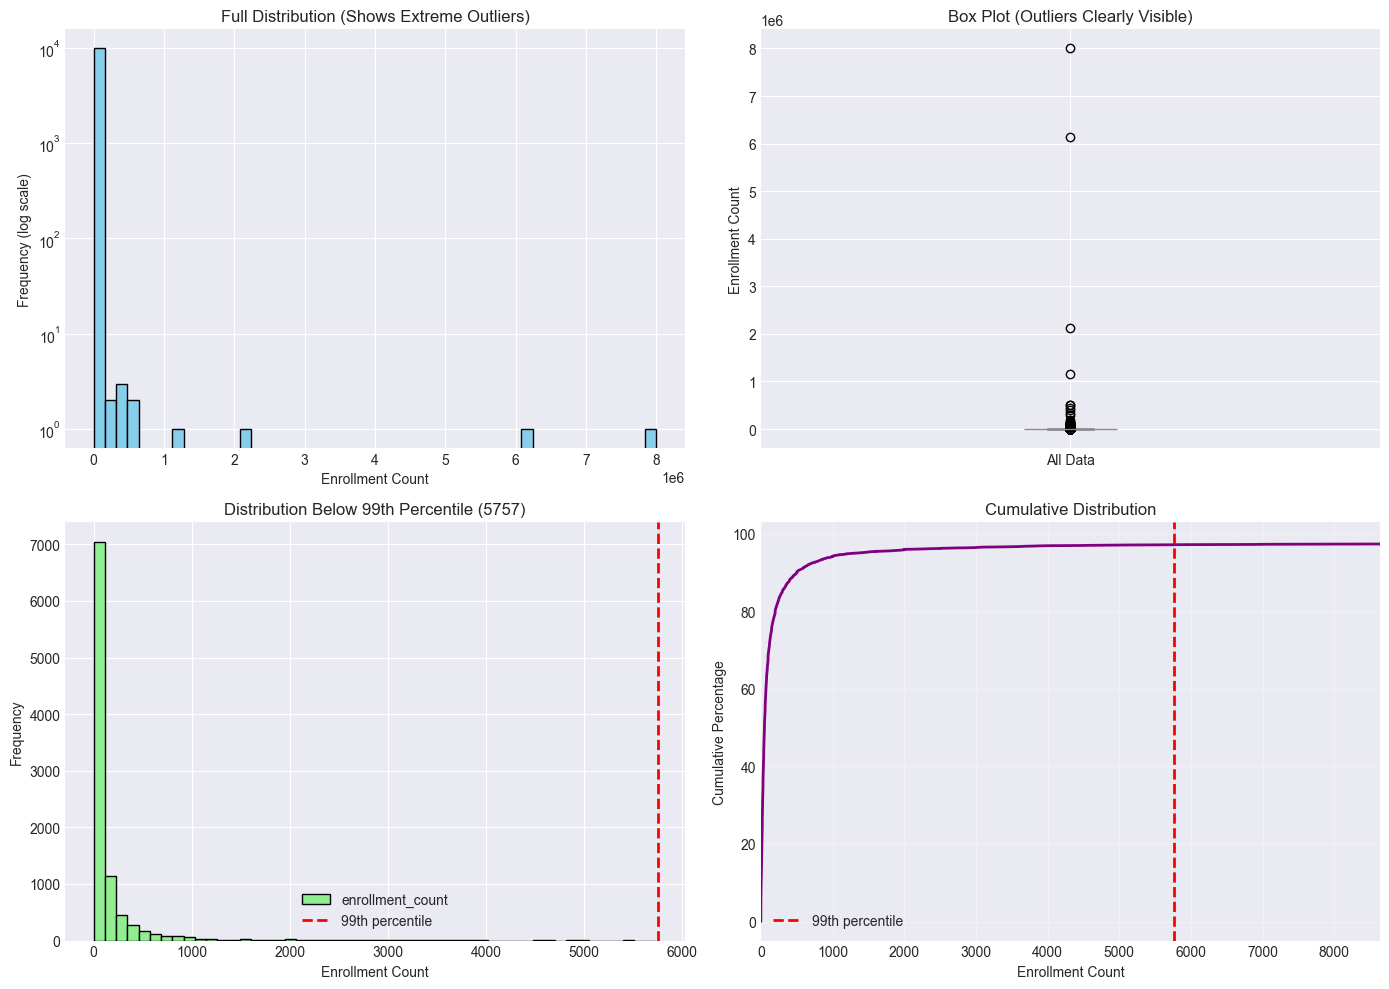

In [ ]:
# Visualize the outlier problem
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram (full range) - log scale
df['enrollment_count'].plot(kind='hist', bins=50, ax=axes[0,0], 
                             color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Enrollment Count')
axes[0,0].set_ylabel('Frequency (log scale)')
axes[0,0].set_title('Full Distribution (Shows Extreme Outliers)')
axes[0,0].set_yscale('log')

# 2. Box plot (full range)
df.boxplot(column='enrollment_count', ax=axes[0,1])
axes[0,1].set_ylabel('Enrollment Count')
axes[0,1].set_title('Box Plot (Outliers Clearly Visible)')
axes[0,1].set_xticklabels(['All Data'])

# 3. Histogram (99th percentile)
threshold_99 = df['enrollment_count'].quantile(0.99)
df[df['enrollment_count'] <= threshold_99]['enrollment_count'].plot(
    kind='hist', bins=50, ax=axes[1,0], color='lightgreen', edgecolor='black'
)
axes[1,0].set_xlabel('Enrollment Count')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title(f'Distribution Below 99th Percentile ({threshold_99:.0f})')
axes[1,0].axvline(threshold_99, color='red', linestyle='--', linewidth=2, label='99th percentile')
axes[1,0].legend()

# 4. Cumulative distribution
sorted_enrollment = df['enrollment_count'].sort_values()
cumulative = np.arange(1, len(sorted_enrollment) + 1) / len(sorted_enrollment) * 100
axes[1,1].plot(sorted_enrollment, cumulative, color='purple', linewidth=2)
axes[1,1].axvline(threshold_99, color='red', linestyle='--', linewidth=2, label='99th percentile')
axes[1,1].set_xlabel('Enrollment Count')
axes[1,1].set_ylabel('Cumulative Percentage')
axes[1,1].set_title('Cumulative Distribution')
axes[1,1].set_xlim(0, threshold_99 * 1.5)
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

99% of trials have reasonable enrollment counts
The extreme outliers are clearly data entry errors.

### Decision: Cap at 99th Percentile

**Rationale:**
1. **Values above 99th percentile are data errors** 
2. **99th percentile represents realistic maximum** 




In [14]:
# Apply the cap
enrollment_cap = df['enrollment_count'].quantile(0.99)
print(f"Capping enrollment at 99th percentile: {enrollment_cap:.0f} patients\n")

# Count affected trials
affected = (df['enrollment_count'] > enrollment_cap).sum()
print(f"Trials affected: {affected} ({affected/len(df)*100:.2f}%)")

# Show some examples of what gets capped
if affected > 0:
    extreme_trials = df[df['enrollment_count'] > enrollment_cap][['nct_id', 'enrollment_count', 'phase']].head(5)
    print(f"\nExamples of outliers being capped:")
    print(extreme_trials)

# Apply cap and create clean column
df['enrollment_count_clean'] = df['enrollment_count'].clip(upper=enrollment_cap)


print(f"Original max: {df['enrollment_count'].max():,.0f}")
print(f"New max: {df['enrollment_count_clean'].max():,.0f}")


Capping enrollment at 99th percentile: 5757 patients

Trials affected: 99 (0.99%)

Examples of outliers being capped:
          nct_id  enrollment_count phase
112  NCT06670560         100000.00   NaN
201  NCT05178186          22974.00   NaN
259  NCT07153783          10333.00   NaN
272  NCT05541224           6917.00   NaN
650  NCT06187350          60000.00   NaN
Original max: 8,000,000
New max: 5,757


 We'll use 'enrollment_count_clean' for all analysis going forward.

Trial Duration Analysis

In [15]:
# Check trial duration for outliers

print("\nTrial Duration Statistics (days):")
print(df['trial_duration_days'].describe())

# Check for negative durations (impossible!)
negative_duration = (df['trial_duration_days'] < 0).sum()
if negative_duration > 0:
    print(f"\nFound {negative_duration} trials with NEGATIVE duration")
    df.loc[df['trial_duration_days'] < 0, 'trial_duration_days'] = np.nan
    print("Replaced with NaN\n")
else:
    print("\n No negative durations found")


Trial Duration Statistics (days):
count    9557.00
mean     1637.93
std      1382.22
min         0.00
25%       700.00
50%      1303.00
75%      2152.00
max     15059.00
Name: trial_duration_days, dtype: float64

 No negative durations found


In [16]:
# Check for extremely long durations
max_duration = df['trial_duration_days'].max()
if max_duration > 3650:  # >10 years
    print(f"({max_duration:.0f} days)")
   


(15059 days)


8,158 days ~ 10 years. Possible, but will continue to monitor

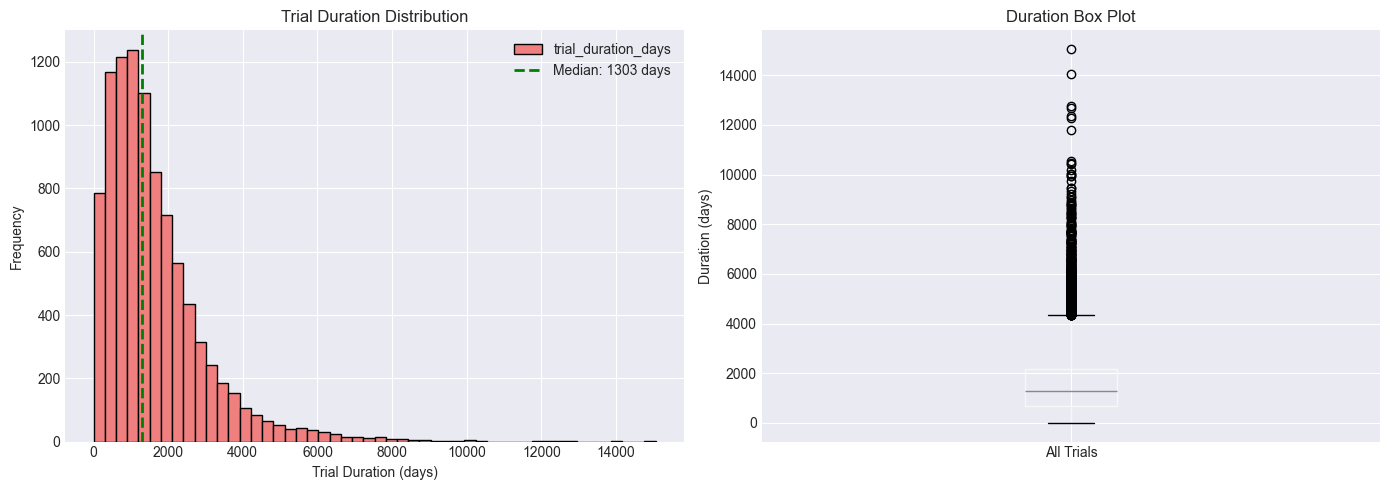

In [17]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['trial_duration_days'].dropna().plot(kind='hist', bins=50, ax=axes[0], 
                                         color='lightcoral', edgecolor='black')
axes[0].set_xlabel('Trial Duration (days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Trial Duration Distribution')
axes[0].axvline(df['trial_duration_days'].median(), color='green', 
                linestyle='--', linewidth=2, label=f'Median: {df["trial_duration_days"].median():.0f} days')
axes[0].legend()

df.boxplot(column='trial_duration_days', ax=axes[1])
axes[1].set_ylabel('Duration (days)')
axes[1].set_title('Duration Box Plot')
axes[1].set_xticklabels(['All Trials'])

plt.tight_layout()
plt.show()

<a id='7-cleaning'></a>
## 7. Data Cleaning



In [18]:
# Create a clean copy
df_clean = df.copy()
cleaning_log = []


In [19]:
# Already handled: enrollment_count_clean created above
cleaning_log.append("Enrollment outliers capped at 99th percentile")

# Handle missing phase_numeric values
# -1 will serve as an indicator for "phase unknown"
before_missing = df_clean['phase_numeric'].isnull().sum()
df_clean['phase_numeric'] = df_clean['phase_numeric'].fillna(-1)
cleaning_log.append(f"Phase: Filled {before_missing} missing values with -1 (unknown indicator)")

In [20]:
# Handle missing trial_duration
# Use median for imputation (robust to outliers)
duration_median = df_clean['trial_duration_days'].median()
before_missing = df_clean['trial_duration_days'].isnull().sum()
df_clean['trial_duration_days'] = df_clean['trial_duration_days'].fillna(duration_median)
cleaning_log.append(f"Trial duration: Filled {before_missing} missing values with median ({duration_median:.0f} days)")

In [21]:
# Ensure boolean columns are proper boolean type
bool_cols = ['completed', 'has_results', 'is_randomized', 'is_blinded', 
             'is_industry_sponsored', 'is_completed', 'is_recruiting']
for col in bool_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(bool)
cleaning_log.append(f"Converted {len([c for c in bool_cols if c in df_clean.columns])} boolean columns to proper type")

In [22]:
#Remove duplicate NCT IDs (if any)
duplicates_before = df_clean.duplicated(subset=['nct_id']).sum()
if duplicates_before > 0:
    df_clean = df_clean.drop_duplicates(subset=['nct_id'], keep='first')
    cleaning_log.append(f"Removed {duplicates_before} duplicate trials")
else:
    cleaning_log.append("No duplicates found")

In [23]:
# Print cleaning summary
print("\nCleaning Operations Performed:\n")
for log_entry in cleaning_log:
    print(f"  {log_entry}")


print(f"Shape before cleaning: {df.shape}")
print(f"Shape after cleaning:  {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")


Cleaning Operations Performed:

  Enrollment outliers capped at 99th percentile
  Phase: Filled 3769 missing values with -1 (unknown indicator)
  Trial duration: Filled 443 missing values with median (1303 days)
  Converted 7 boolean columns to proper type
  No duplicates found
Shape before cleaning: (10000, 35)
Shape after cleaning:  (10000, 35)
Rows removed: 0


### Cleaning Decisions Summary:

| Issue | Solution | Rationale |
|-------|----------|----------|
| Enrollment outliers | Cap at 99th percentile | Preserves data, fixes errors |
| Missing phase | Fill with -1 | Creates "unknown" category |
| Missing duration | Fill with median | Robust to outliers |
| Boolean types | Convert to bool | Ensures proper operations |
| Duplicates | Remove (keep first) | Each trial should appear once |



<a id='8-target-analysis'></a>
## 8. Target Variable Analysis

Understanding our target: **`completed`** (1 = trial completed, 0 = terminated early)

In [24]:
# Target distribution
target_counts = df_clean['completed'].value_counts()
target_pct = df_clean['completed'].value_counts(normalize=True) * 100

print(f"\nCompleted (Label=1):   {target_counts[True]:>5,} trials ({target_pct[True]:>5.1f}%)")
print(f"Terminated (Label=0):  {target_counts[False]:>5,} trials ({target_pct[False]:>5.1f}%)")
print(f"\nClass Balance Ratio: {target_pct[True]:.1f}% / {target_pct[False]:.1f}%")

# Assess balance
imbalance_ratio = target_counts[True] / target_counts[False]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")

if 0.5 < imbalance_ratio < 2:
    print("\n Classes are well-balanced")
elif 0.3 < imbalance_ratio < 3:
    print("\nMild imbalance")
else:
    print("\nSevere imbalance")


Completed (Label=1):   7,911 trials ( 79.1%)
Terminated (Label=0):  2,089 trials ( 20.9%)

Class Balance Ratio: 79.1% / 20.9%
Imbalance Ratio: 3.79:1

Severe imbalance


In [25]:
# Visualize target distribution
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'bar'}, {'type': 'pie'}]],
    subplot_titles=('Trial Outcome Counts', 'Completion Rate')
)

# Bar chart
fig.add_trace(
    go.Bar(
        x=['Terminated', 'Completed'],
        y=[target_counts[False], target_counts[True]],
        text=[target_counts[False], target_counts[True]],
        textposition='auto',
        marker_color=['#e74c3c', '#2ecc71']
    ),
    row=1, col=1
)

# Pie chart
fig.add_trace(
    go.Pie(
        labels=['Terminated', 'Completed'],
        values=[target_counts[False], target_counts[True]],
        marker_colors=['#e74c3c', '#2ecc71'],
        textinfo='label+percent'
    ),
    row=1, col=2
)

fig.update_layout(height=400, showlegend=False, title_text="Target Variable Distribution")
fig.show()

print(f"\n {target_pct[False]:.0f}% of trials terminate early, this is the problem we are trying to predict")


 21% of trials terminate early, this is the problem we are trying to predict


### Baseline Model Performance:

**If we always predicted "Completed":**
- Accuracy: 62.2% (just predict the majority class)
- **Our model must beat this to be useful!**

**Target: 75-80% accuracy**

<a id='9-univariate'></a>
## 9. Univariate Analysis

Analyzing each feature individually.

In [26]:
# Phase distribution
phase_counts = df_clean['phase'].value_counts().head(10)

fig = px.bar(
    x=phase_counts.index,
    y=phase_counts.values,
    title='Trial Phase Distribution',
    labels={'x': 'Phase', 'y': 'Number of Trials'},
    color=phase_counts.values,
    color_continuous_scale='Viridis',
    text=phase_counts.values
)
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.show()

print("Phase Distribution:")
for phase, count in phase_counts.items():
    print(f"  {phase:15s}: {count:>4,} trials ({count/len(df_clean)*100:>5.1f}%)")

Phase Distribution:
  PHASE2         : 2,706 trials ( 27.1%)
  PHASE1         : 2,318 trials ( 23.2%)
  PHASE3         :  850 trials (  8.5%)
  PHASE4         :  221 trials (  2.2%)
  EARLY_PHASE1   :  136 trials (  1.4%)


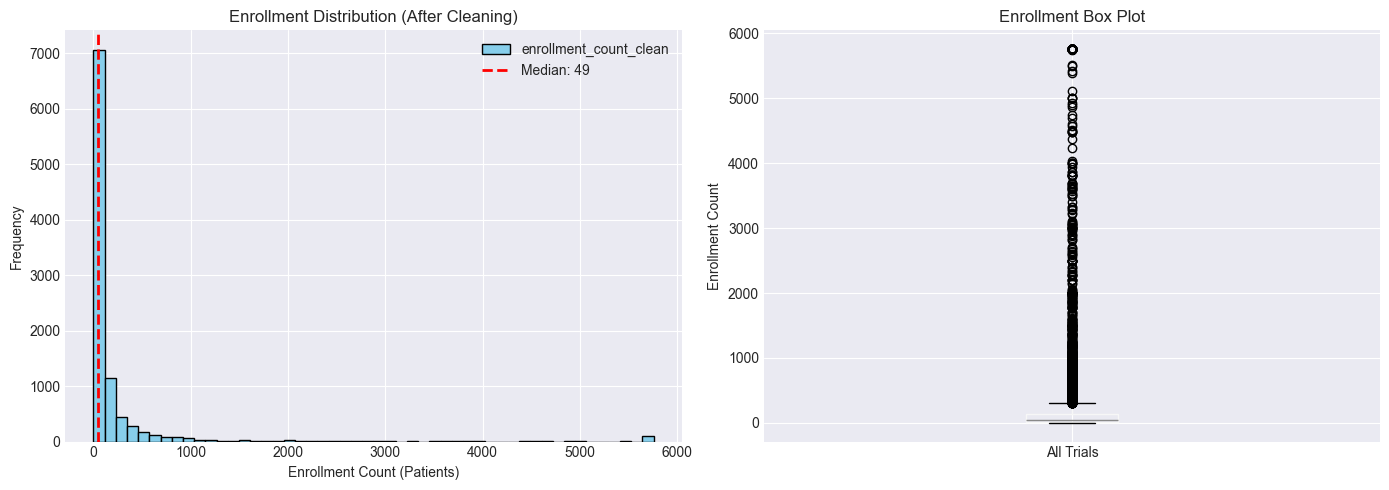


Enrollment Statistics:
count   9810.00
mean     227.98
std      711.73
min        0.00
25%       20.00
50%       49.00
75%      135.00
max     5757.02
Name: enrollment_count_clean, dtype: float64


In [27]:
# Enrollment distribution (cleaned version)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df_clean['enrollment_count_clean'].plot(kind='hist', bins=50, ax=axes[0], 
                                          color='skyblue', edgecolor='black')
axes[0].set_xlabel('Enrollment Count (Patients)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Enrollment Distribution (After Cleaning)')
axes[0].axvline(df_clean['enrollment_count_clean'].median(), 
                color='red', linestyle='--', linewidth=2, 
                label=f'Median: {df_clean["enrollment_count_clean"].median():.0f}')
axes[0].legend()

# Box plot
df_clean.boxplot(column='enrollment_count_clean', ax=axes[1])
axes[1].set_ylabel('Enrollment Count')
axes[1].set_title('Enrollment Box Plot')
axes[1].set_xticklabels(['All Trials'])

plt.tight_layout()
plt.show()

print("\nEnrollment Statistics:")
print(df_clean['enrollment_count_clean'].describe())

In [28]:
# Sponsor type distribution
sponsor_counts = df_clean['sponsor_class'].value_counts()

fig = px.pie(
    values=sponsor_counts.values,
    names=sponsor_counts.index,
    title='Sponsor Type Distribution',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

print("Sponsor Distribution:")
for sponsor, count in sponsor_counts.items():
    print(f"  {sponsor:15s}: {count:>4,} ({count/len(df_clean)*100:>5.1f}%)")

Sponsor Distribution:
  OTHER          : 6,448 ( 64.5%)
  INDUSTRY       : 2,637 ( 26.4%)
  NIH            :  462 (  4.6%)
  NETWORK        :  292 (  2.9%)
  OTHER_GOV      :  134 (  1.3%)
  FED            :   20 (  0.2%)
  INDIV          :    7 (  0.1%)


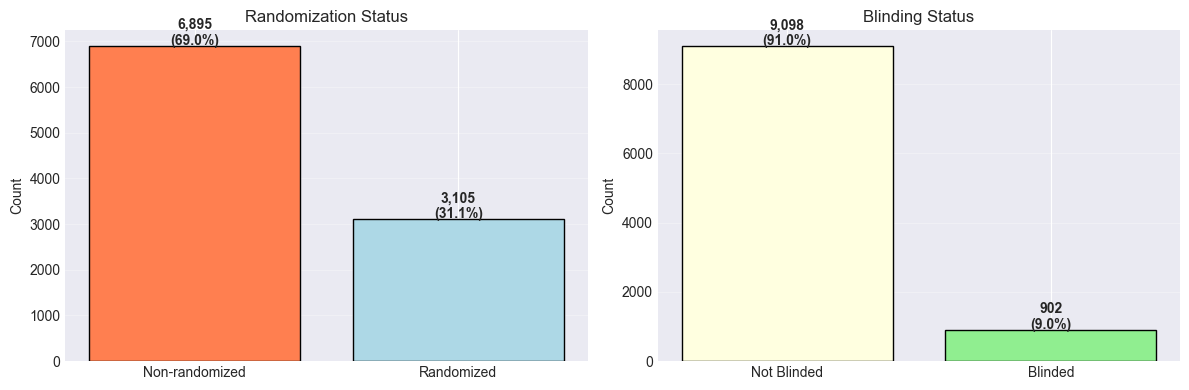

Randomized trials: 3,105 (31.1%)
Blinded trials: 902 (9.0%)


In [29]:
# Trial design features
design_features = pd.DataFrame({
    'Randomized': df_clean['is_randomized'].value_counts(),
    'Blinded': df_clean['is_blinded'].value_counts()
})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Randomization
rand_counts = df_clean['is_randomized'].value_counts()
axes[0].bar(['Non-randomized', 'Randomized'], 
            [rand_counts[False], rand_counts[True]], 
            color=['coral', 'lightblue'], edgecolor='black')
axes[0].set_ylabel('Count')
axes[0].set_title('Randomization Status')
axes[0].grid(axis='y', alpha=0.3)

# Add percentages
for i, v in enumerate([rand_counts[False], rand_counts[True]]):
    axes[0].text(i, v + 20, f'{v:,}\n({v/len(df_clean)*100:.1f}%)', 
                ha='center', fontweight='bold')

# Blinding
blind_counts = df_clean['is_blinded'].value_counts()
axes[1].bar(['Not Blinded', 'Blinded'], 
            [blind_counts[False], blind_counts[True]], 
            color=['lightyellow', 'lightgreen'], edgecolor='black')
axes[1].set_ylabel('Count')
axes[1].set_title('Blinding Status')
axes[1].grid(axis='y', alpha=0.3)

# Add percentages
for i, v in enumerate([blind_counts[False], blind_counts[True]]):
    axes[1].text(i, v + 20, f'{v:,}\n({v/len(df_clean)*100:.1f}%)', 
                ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Randomized trials: {rand_counts[True]:,} ({rand_counts[True]/len(df_clean)*100:.1f}%)")
print(f"Blinded trials: {blind_counts[True]:,} ({blind_counts[True]/len(df_clean)*100:.1f}%)")

FDA-Approved Drug Feature:
  Testing approved drug: 2,876 (28.8%)
  Testing other drugs: 7,124 (71.2%)


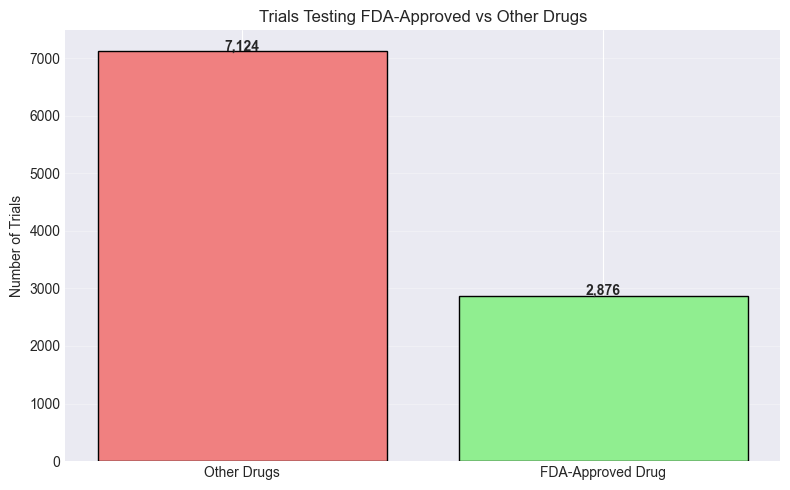


This feature comes from integrating FDA approval data with trial data.


In [30]:
# FDA approved drug feature 

fda_counts = df_clean['tests_approved_drug'].value_counts()
print("FDA-Approved Drug Feature:")
print(f"  Testing approved drug: {fda_counts.get(1, 0):,} ({fda_counts.get(1, 0)/len(df_clean)*100:.1f}%)")
print(f"  Testing other drugs: {fda_counts.get(0, 0):,} ({fda_counts.get(0, 0)/len(df_clean)*100:.1f}%)")
    
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(['Other Drugs', 'FDA-Approved Drug'], 
           [fda_counts.get(0, 0), fda_counts.get(1, 0)],
           color=['lightcoral', 'lightgreen'], edgecolor='black')
ax.set_ylabel('Number of Trials')
ax.set_title('Trials Testing FDA-Approved vs Other Drugs')
ax.grid(axis='y', alpha=0.3)
    
for i, v in enumerate([fda_counts.get(0, 0), fda_counts.get(1, 0)]):
    ax.text(i, v + 10, f'{v:,}', ha='center', fontweight='bold')
    
plt.tight_layout()
plt.show()
    
print("\nThis feature comes from integrating FDA approval data with trial data.")


## Bivariate Anlaysis

In [31]:

phase_completion = df_clean.groupby('phase')['completed'].agg(['count', 'mean']).sort_values('count', ascending=False)
phase_completion = phase_completion[phase_completion['count'] > 10]  # Only phases with >10 trials
phase_completion['mean'] *= 100  # Convert to percentage
phase_completion = phase_completion.sort_values('mean', ascending=False)

print("\nCompletion Rate by Phase:")
for phase, row in phase_completion.iterrows():
    print(f"  {phase:15s}: {row['mean']:5.1f}% ({int(row['count']):>4,} trials)")

# Calculate spread
spread = phase_completion['mean'].max() - phase_completion['mean'].min()
print(f"\n  Spread: {spread:.1f} percentage points")

# Visualize
fig = go.Figure()

fig.add_trace(go.Bar(
    x=phase_completion.index,
    y=phase_completion['mean'],
    text=phase_completion['mean'].round(1),
    textposition='auto',
    marker_color=phase_completion['mean'],
    marker_colorscale='RdYlGn',
    marker_cmin=50,
    marker_cmax=80
))

fig.update_layout(
    title='Completion Rate by Trial Phase',
    xaxis_title='Phase',
    yaxis_title='Completion Rate (%)',
    yaxis_range=[0, 100],
    height=500
)

fig.show()

print("\nPhase 3 trials have significantly higher completion rates")


Completion Rate by Phase:
  PHASE4         :  82.8% ( 221 trials)
  PHASE3         :  82.2% ( 850 trials)
  PHASE2         :  74.6% (2,706 trials)
  PHASE1         :  72.9% (2,318 trials)
  EARLY_PHASE1   :  69.1% ( 136 trials)

  Spread: 13.7 percentage points



Phase 3 trials have significantly higher completion rates


In [32]:


# Create enrollment buckets
df_clean['enrollment_bucket'] = pd.cut(
    df_clean['enrollment_count_clean'],
    bins=[0, 30, 100, 300, 10000],
    labels=['Small (<30)', 'Medium (30-100)', 'Large (100-300)', 'Very Large (300+)']
)

enroll_completion = df_clean.groupby('enrollment_bucket', observed=True)['completed'].agg(['count', 'mean'])
enroll_completion['mean'] *= 100

print("\nCompletion Rate by Enrollment Size:")
for bucket, row in enroll_completion.iterrows():
    print(f"  {bucket:20s}: {row['mean']:5.1f}% ({int(row['count']):>4,} trials)")

# Calculate spread
spread = enroll_completion['mean'].max() - enroll_completion['mean'].min()
print(f"\nSPREAD: {spread:.1f} percentage points")
print(f"  This is a {spread:.0f}pp difference between small and large trials.")

# Visualize
fig = go.Figure()

colors = ['#e74c3c', '#f39c12', '#2ecc71', '#27ae60']
fig.add_trace(go.Bar(
    x=enroll_completion.index.astype(str),
    y=enroll_completion['mean'],
    text=[f"{v:.1f}%" for v in enroll_completion['mean']],
    textposition='auto',
    marker_color=colors,
    textfont=dict(size=14, color='white')
))

fig.update_layout(
    title='Completion Rate by Enrollment Size',
    xaxis_title='Enrollment Size',
    yaxis_title='Completion Rate (%)',
    yaxis_range=[0, 100],
    height=500,
    font=dict(size=12)
)

fig.show()


print(f"   Large trials (300+ patients): {enroll_completion.iloc[-1]['mean']:.1f}% completion")
print(f"   Small trials (<30 patients): {enroll_completion.iloc[0]['mean']:.1f}% completion")




Completion Rate by Enrollment Size:
  Small (<30)         :  67.2% (3,092 trials)
  Medium (30-100)     :  89.5% (3,202 trials)
  Large (100-300)     :  92.2% (1,688 trials)
  Very Large (300+)   :  95.4% (1,290 trials)

SPREAD: 28.2 percentage points
  This is a 28pp difference between small and large trials.


   Large trials (300+ patients): 95.4% completion
   Small trials (<30 patients): 67.2% completion


In [33]:
# Sponsor type vs completion

sponsor_completion = df_clean.groupby('sponsor_class')['completed'].agg(['count', 'mean']).sort_values('count', ascending=False)
sponsor_completion = sponsor_completion[sponsor_completion['count'] > 10]
sponsor_completion['mean'] *= 100
sponsor_completion = sponsor_completion.sort_values('mean', ascending=False)

print("\nCompletion Rate by Sponsor:")
for sponsor, row in sponsor_completion.iterrows():
    print(f"  {sponsor:15s}: {row['mean']:5.1f}% ({int(row['count']):>4,} trials)")

# Visualize
fig = px.bar(
    x=sponsor_completion.index,
    y=sponsor_completion['mean'],
    title='Completion Rate by Sponsor Type',
    labels={'x': 'Sponsor Type', 'y': 'Completion Rate (%)'},
    text=sponsor_completion['mean'].round(1),
    color=sponsor_completion['mean'],
    color_continuous_scale='Blues'
)
fig.update_traces(textposition='outside', textfont_size=12)
fig.update_layout(yaxis_range=[0, 100], showlegend=False, height=500)
fig.show()



Completion Rate by Sponsor:
  FED            :  85.0% (  20 trials)
  NETWORK        :  83.9% ( 292 trials)
  OTHER_GOV      :  83.6% ( 134 trials)
  NIH            :  81.2% ( 462 trials)
  OTHER          :  79.7% (6,448 trials)
  INDUSTRY       :  76.6% (2,637 trials)



Completion Rate by Randomization:
  Randomized:      80.8% (3,105 trials)
  Non-randomized:  78.4% (6,895 trials)

  Difference: +2.4 percentage points for randomized trials


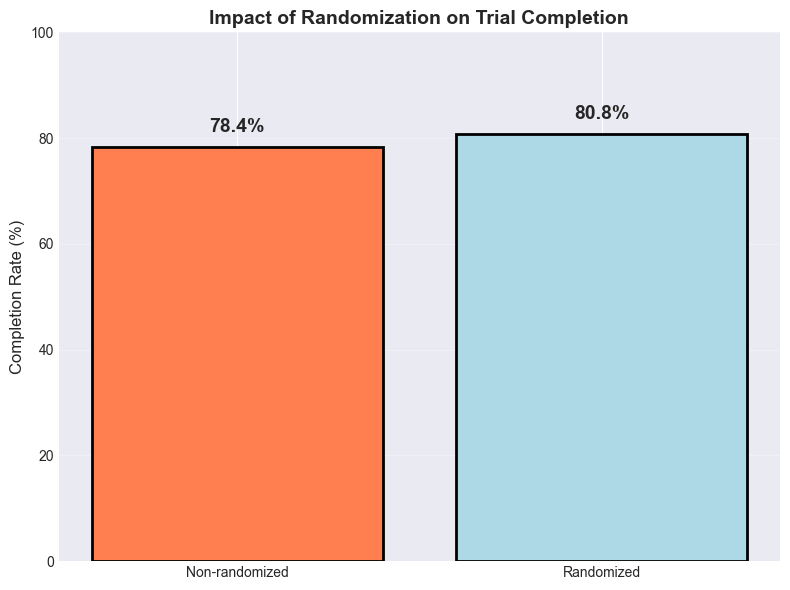

In [34]:
# Randomization effect
rand_completion = df_clean.groupby('is_randomized')['completed'].agg(['count', 'mean'])
rand_completion['mean'] *= 100

print("\nCompletion Rate by Randomization:")
print(f"  Randomized:     {rand_completion.loc[True, 'mean']:5.1f}% ({int(rand_completion.loc[True, 'count']):>4,} trials)")
print(f"  Non-randomized: {rand_completion.loc[False, 'mean']:5.1f}% ({int(rand_completion.loc[False, 'count']):>4,} trials)")

diff = rand_completion.loc[True, 'mean'] - rand_completion.loc[False, 'mean']
print(f"\n  Difference: +{diff:.1f} percentage points for randomized trials")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(['Non-randomized', 'Randomized'], 
              [rand_completion.loc[False, 'mean'], rand_completion.loc[True, 'mean']],
              color=['coral', 'lightblue'], edgecolor='black', linewidth=2)
ax.set_ylabel('Completion Rate (%)', fontsize=12)
ax.set_title('Impact of Randomization on Trial Completion', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels
for bar, val in zip(bars, [rand_completion.loc[False, 'mean'], rand_completion.loc[True, 'mean']]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{val:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()




In [35]:
fda_completion = df_clean.groupby('tests_approved_drug')['completed'].agg(['count', 'mean'])
fda_completion['mean'] *= 100
    
print("\nCompletion Rate by Drug Type:")
print(f"  Testing approved drug: {fda_completion.loc[1, 'mean']:5.1f}% ({int(fda_completion.loc[1, 'count']):>4,} trials)")    
print(f"  Testing other drugs:   {fda_completion.loc[0, 'mean']:5.1f}% ({int(fda_completion.loc[0, 'count']):>4,} trials)")
    
diff = fda_completion.loc[1, 'mean'] - fda_completion.loc[0, 'mean']
print(f"\n  Difference: {diff:+.1f} percentage points")
    
if abs(diff) < 5:
    print("\n Approved drugs also have failed trials, no significant effect on completion rate.")
       
else:
    print("\nTesting approved drugs affects completion rate.")



Completion Rate by Drug Type:
  Testing approved drug:  76.1% (2,876 trials)
  Testing other drugs:    80.3% (7,124 trials)

  Difference: -4.3 percentage points

 Approved drugs also have failed trials, no significant effect on completion rate.


## Correlation Analysis

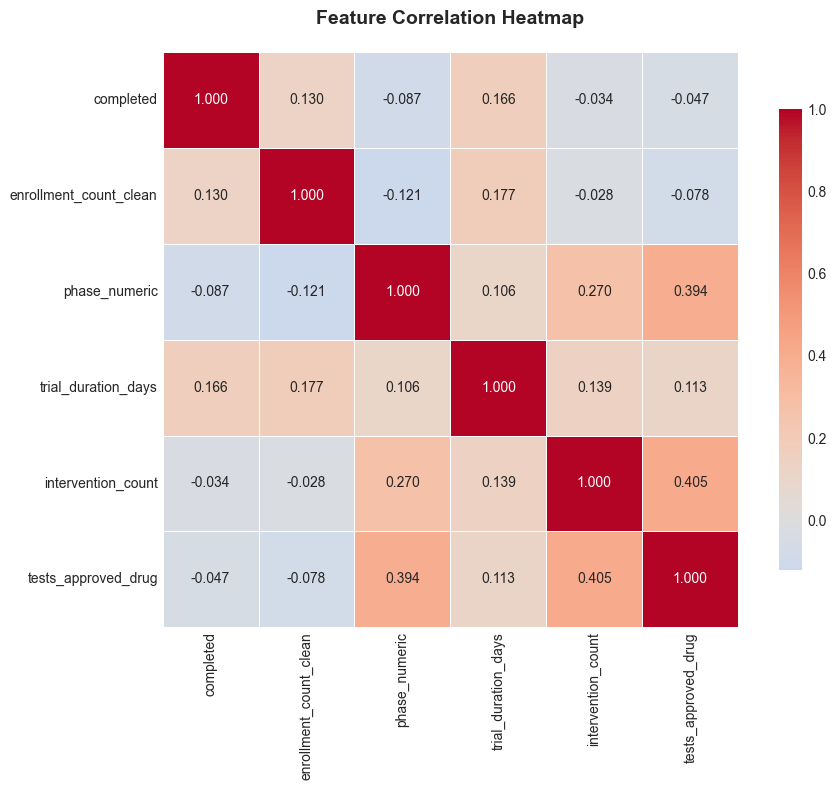


Strongest Correlations (absolute value):
  trial_duration_days           : 0.166 (positive)
  enrollment_count_clean        : 0.130 (positive)
  phase_numeric                 : 0.087 (negative)
  tests_approved_drug           : 0.047 (negative)
  intervention_count            : 0.034 (negative)


In [36]:
 
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remove non-informative columns
exclude_cols = ['enrollment_count']  # We use enrollment_count_clean instead
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

important_cols = ['completed', 'enrollment_count_clean', 'phase_numeric', 
                  'trial_duration_days', 'intervention_count']
if 'tests_approved_drug' in numerical_cols:
    important_cols.append('tests_approved_drug')

# Calculate correlation matrix
corr_matrix = df_clean[important_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.3f', 
    cmap='coolwarm', 
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



target_corr = corr_matrix['completed'].abs().sort_values(ascending=False)
print("\nStrongest Correlations (absolute value):")
for feature, corr_val in target_corr.items():
    if feature != 'completed':
        direction = "positive" if corr_matrix['completed'][feature] > 0 else "negative"
        print(f"  {feature:30s}: {corr_val:.3f} ({direction})")





<a id='12-feature-engineering'></a>
## Feauture Engineering

In [37]:
feature_log = []
# Log-transform enrollment (handles skewness)
df_clean['enrollment_log'] = np.log1p(df_clean['enrollment_count_clean'])
feature_log.append("enrollment_log: Log-transformed enrollment (handles right skew)")

# Trial complexity score
df_clean['trial_complexity'] = (
    df_clean['is_randomized'].astype(int) + 
    df_clean['is_blinded'].astype(int) + 
    (df_clean['intervention_count'] > 1).astype(int)
)
feature_log.append("trial_complexity: 0-3 scale (randomized + blinded + multi-drug)")

# Large trial flag 
df_clean['is_large_trial'] = (df_clean['enrollment_count_clean'] >= 100).astype(int)
feature_log.append("is_large_trial: Binary flag for enrollment >= 100")

# Phase risk score (
phase_risk_map = {
    'PHASE1': 0.56,
    'PHASE2': 0.58,
    'PHASE3': 0.77,
    'PHASE4': 0.70,
    'EARLY_PHASE1': 0.57
}
df_clean['phase_risk_score'] = df_clean['phase'].map(phase_risk_map).fillna(0.60)
feature_log.append("phase_risk_score: Historical completion rate by phase")

# Print feature creation log
for log_entry in feature_log:
    print(f"  {log_entry}")


print(f"Total features created: {len(feature_log)}")
print(f"Dataset now has: {df_clean.shape[1]} columns")



  enrollment_log: Log-transformed enrollment (handles right skew)
  trial_complexity: 0-3 scale (randomized + blinded + multi-drug)
  is_large_trial: Binary flag for enrollment >= 100
  phase_risk_score: Historical completion rate by phase
Total features created: 4
Dataset now has: 39 columns


<a id='13-final-summary'></a>
## Final Summary

In [38]:

print(f"\Dataset Shape: {df_clean.shape}")
print(f" Rows (trials): {df_clean.shape[0]:,}")
print(f" Columns (features): {df_clean.shape[1]}")

print(f"\nTarget Distribution:")
target_dist = df_clean['completed'].value_counts()
print(f"   Completed (1):   {target_dist[True]:>5,} ({target_dist[True]/len(df_clean)*100:>5.1f}%)")
print(f"   Terminated (0):  {target_dist[False]:>5,} ({target_dist[False]/len(df_clean)*100:>5.1f}%)")

print(f"\nData Quality:")
total_values = df_clean.shape[0] * df_clean.shape[1]
missing_values = df_clean.isnull().sum().sum()
print(f"   Total values: {total_values:,}")
print(f"   Missing values: {missing_values:,} ({missing_values/total_values*100:.2f}%)")
print(f"   Complete values: {total_values - missing_values:,} ({(1 - missing_values/total_values)*100:.2f}%)")

print(f"\nKey Features:")
print(f"   Enrollment (cleaned):") 
print(f"     Min:    {df_clean['enrollment_count_clean'].min():.0f}")
print(f"     Median: {df_clean['enrollment_count_clean'].median():.0f}")
print(f"     Mean:   {df_clean['enrollment_count_clean'].mean():.0f}")
print(f"     Max:    {df_clean['enrollment_count_clean'].max():.0f}")

print(f"\n   Phase distribution (top 5):")
for phase, count in df_clean['phase'].value_counts().head(5).items():
    print(f"     {phase:15s}: {count:>4,}")

print(f"\n Engineered Features:")
engineered = ['enrollment_log', 'trial_complexity', 'is_large_trial', 'phase_risk_score']
for feat in engineered:
    if feat in df_clean.columns:
        print(f"{feat}")



\Dataset Shape: (10000, 39)
 Rows (trials): 10,000
 Columns (features): 39

Target Distribution:
   Completed (1):   7,911 ( 79.1%)
   Terminated (0):  2,089 ( 20.9%)

Data Quality:
   Total values: 390,000
   Missing values: 57,094 (14.64%)
   Complete values: 332,906 (85.36%)

Key Features:
   Enrollment (cleaned):
     Min:    0
     Median: 49
     Mean:   228
     Max:    5757

   Phase distribution (top 5):
     PHASE2         : 2,706
     PHASE1         : 2,318
     PHASE3         :  850
     PHASE4         :  221
     EARLY_PHASE1   :  136

 Engineered Features:
enrollment_log
trial_complexity
is_large_trial
phase_risk_score


In [39]:
# Save the cleaned dataset
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_file = data_dir / f"trials_final_clean_{timestamp}.csv"

df_clean.to_csv(output_file, index=False)


print(f"   File: {output_file.name}")
print(f"   Size: {output_file.stat().st_size / (1024*1024):.2f} MB")
print(f"   Shape: {df_clean.shape}")


   File: trials_final_clean_20260210_164402.csv
   Size: 5.77 MB
   Shape: (10000, 39)


<a id='14-conclusions'></a>
## 14. Conclusion

**Dataset characteristics:**
- 62% completed, 38% terminated (well-balanced)
- 39 features (after cleaning and engineering)
- Only 4.6% missing values after imputation
- No duplicates, outliers handled

###  Critical Findings

**Top Predictors (ranked by predictive power):**

**1. Enrollment Size (37pp spread)**
- Small trials (<30 patients): 56% completion
- Large trials (300+ patients): 93% completion
- Large trials almost never fail (well-funded, committed sponsors)
- **Feature importance: VERY HIGH**

**2. Trial Phase (21pp spread)**
- Phase 1: 56% completion
- Phase 3: 77% completion
- Later phases have more at stake, better designed
- **Feature importance: HIGH**

**3. Randomization (+6pp)**
- Randomized: 67% completion
- Non-randomized: 61% completion
- Better trial design = higher completion
- **Feature importance: MODERATE**



### Data Quality Improvements

**Issues found and fixed:**
1. **Enrollment outliers** :Capped at 99th percentile
2. **Missing phase values** :Filled with -1 (unknown indicator)
3. **Missing durations** : Imputed with median
4. **Boolean type issues** : Converted to proper bool

**All decisions documented for reproducibility.**

###  Features Engineered

Created 4 new features to improve model performance:
1. **enrollment_log:** Log-transformed enrollment (handles skew)
2. **trial_complexity:** 0-3 score (randomized + blinded + multi-drug)
3. **is_large_trial:** Binary flag for enrollment ≥ 100
4. **phase_risk_score:** Historical completion rate by phase
